In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

Independent instances:
    $$X(t) := N(0, \sigma_{independent\_variables})$$
Dependent instances:
    $$X(t) := k_i*X(t-i\cdot n_{independent\_ variables}) + N(0, \sigma_{dependent\_ variables}) \;\; \forall k_i \in k_{multipliers}$$
    or, equivalently:
    $$X(t+i\cdot n_{independent\_ variables}) = k_i*X(t) + N(0, \sigma_{dependent\_ variables}) \;\; \forall k_i \in k_{multipliers}$$

In [2]:
from ScoreAndSearch_1d_times_series import ScoreAndSearch_1d_times_series
from create_causal_data import create_causal_data

sigma_independent_variables=1
sigma_dependent_variables=10**-1
def test_search(n_ts=3):
    def plotGraph(graph):
        G = nx.DiGraph(graph)

        # For a beautiful graph
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
        node_color = ['green' if node == 'Survived' else 'skyblue' for node in G.nodes()]
        edge_color = ['green' if edge[1] == 'Survived' else 'black' for edge in G.edges()]

        nx.draw(G, pos, node_color=node_color, edge_color=edge_color, 
                with_labels=True, font_weight='bold')
        plt.show()
    
    data = [create_causal_data(n_independent_instances=3,  k_multipliers=[1, 2, 3], 
                        sigma_independent_variables=sigma_independent_variables, sigma_dependent_variables=sigma_dependent_variables)
                for _ in range(n_ts)]
    
    # Discretize time series; remember that between -5sigma and 5sigma there is a 99.7% of the theoretical data
    data = [np.digitize(time_series, bins=np.linspace(-5*sigma_independent_variables, 5*sigma_independent_variables, 10))
            for time_series in data]
    

    data = pd.DataFrame(data).rename(index={i: f"ts_{i}" for i in range(n_ts)})

    score_and_search = ScoreAndSearch_1d_times_series(maximum_parents=3)
    graph = score_and_search.search(ts_df=data)
    plotGraph(graph)

c:\Users\jmate\miniconda3\envs\causal-inference\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


After time 0 the graph is []
After time 1 the graph is []
After time 2 the graph is []
After time 3 the graph is []
After time 4 the graph is [(1, 4)]
After time 5 the graph is [(1, 4), (2, 5)]
After time 6 the graph is [(1, 4), (2, 5)]
After time 7 the graph is [(1, 4), (2, 5), (1, 7)]
After time 8 the graph is [(1, 4), (2, 5), (1, 7)]
After time 9 the graph is [(1, 4), (2, 5), (1, 7)]
After time 10 the graph is [(1, 4), (2, 5), (1, 7)]
After time 11 the graph is [(1, 4), (2, 5), (1, 7), (2, 11)]


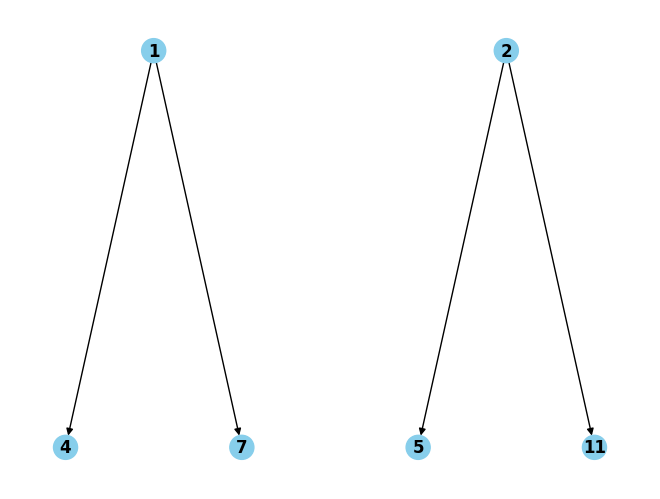

In [3]:
test_search(10)

After time 0 the graph is []
After time 1 the graph is []
After time 2 the graph is []
After time 3 the graph is [(0, 3)]
After time 4 the graph is [(0, 3), (1, 4)]
After time 5 the graph is [(0, 3), (1, 4), (2, 5)]
After time 6 the graph is [(0, 3), (1, 4), (2, 5), (0, 6)]
After time 7 the graph is [(0, 3), (1, 4), (2, 5), (0, 6), (1, 7)]
After time 8 the graph is [(0, 3), (1, 4), (2, 5), (0, 6), (1, 7), (2, 8)]
After time 9 the graph is [(0, 3), (1, 4), (2, 5), (0, 6), (1, 7), (2, 8), (0, 9)]
After time 10 the graph is [(0, 3), (1, 4), (2, 5), (0, 6), (1, 7), (2, 8), (0, 9), (1, 10)]
After time 11 the graph is [(0, 3), (1, 4), (2, 5), (0, 6), (1, 7), (2, 8), (0, 9), (1, 10), (2, 11)]


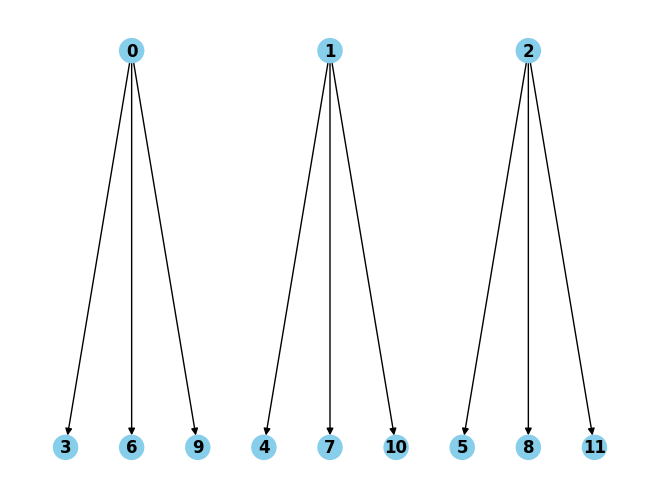

In [4]:
test_search(100)